In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import talib as tb
import mplfinance as mpf
import nltk 
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [59]:
# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

In [60]:

raw_analyst = pd.read_csv("../Data/raw_analyst_ratings.csv")

# Sentiment analysis data

In [61]:
raw_analyst.shape

(1407328, 6)

In [62]:
raw_analyst.head(20)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [63]:
raw_analyst['date'].unique

<bound method Series.unique of 0          2020-06-05 10:30:54-04:00
1          2020-06-03 10:45:20-04:00
2          2020-05-26 04:30:07-04:00
3          2020-05-22 12:45:06-04:00
4          2020-05-22 11:38:59-04:00
                     ...            
1407323          2011-08-29 00:00:00
1407324          2011-06-22 00:00:00
1407325          2011-06-21 00:00:00
1407326          2011-06-21 00:00:00
1407327          2011-05-12 00:00:00
Name: date, Length: 1407328, dtype: object>

In [64]:
raw_analyst.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [65]:
print(raw_analyst.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [66]:
raw_analyst['date'] = pd.to_datetime(raw_analyst['date'], format = 'ISO8601', utc = True)

In [67]:
raw_analyst['date'].isnull().sum()

0

In [68]:
# Calculate the length of each headline
raw_analyst['headline_length'] = raw_analyst['headline'].apply(len)

In [69]:
# Get basic statistics for headline lengths
length_stats = raw_analyst['headline_length'].describe()
print(length_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [70]:
publisher_counts = raw_analyst['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\1606217717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')


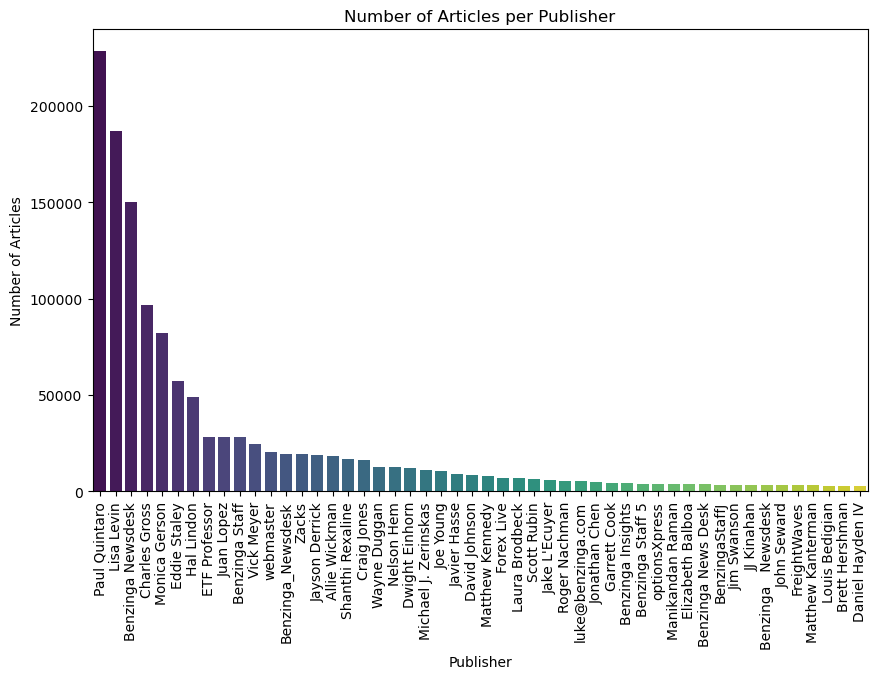

In [71]:
top_publishers = publisher_counts.head(50)
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()

In [72]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [73]:
sia = SentimentIntensityAnalyzer()

C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\2916680717.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_class', data=raw_analyst, palette='coolwarm')


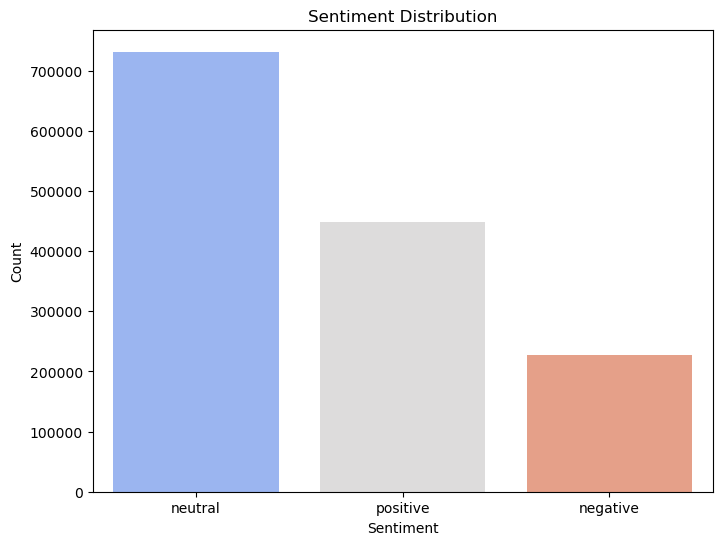

In [74]:
# Apply sentiment analysis to the headlines
raw_analyst['sentiment'] = raw_analyst['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment as positive, neutral, or negative
raw_analyst['sentiment_class'] = raw_analyst['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_class', data=raw_analyst, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [75]:
raw_analyst[['headline', 'sentiment', 'sentiment_class']].head(20)

,headline,sentiment,sentiment_class
0,Stocks That Hit 52-Week Highs On Friday,0.0000,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.0000,neutral
2,71 Biggest Movers From Friday,0.0000,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.0000,neutral
4,B of A Securities Maintains Neutral on Agilent...,0.2960,positive
5,"CFRA Maintains Hold on Agilent Technologies, L...",-0.1280,negative
6,"UBS Maintains Neutral on Agilent Technologies,...",0.0000,neutral
7,Agilent Technologies shares are trading higher...,0.2960,positive
8,Wells Fargo Maintains Overweight on Agilent Te...,-0.1280,negative
9,10 Biggest Price Target Changes For Friday,0.0000,neutral


In [76]:
nat_count = raw_analyst.isna().sum()
nat_count

Unnamed: 0         0
headline           0
url                0
publisher          0
date               0
stock              0
headline_length    0
sentiment          0
sentiment_class    0
dtype: int64

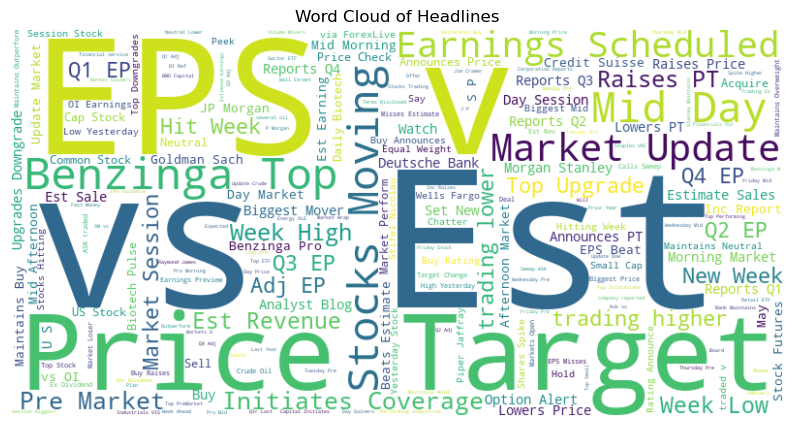

In [77]:
# Combine all headlines into one string
all_headlines = ' '.join(raw_analyst['headline'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()


In [78]:
print(raw_analyst.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length', 'sentiment', 'sentiment_class'],
      dtype='object')


In [79]:
raw_analyst['year'] = raw_analyst['date'].dt.year
raw_analyst['month'] = raw_analyst['date'].dt.month
raw_analyst['day'] = raw_analyst['date'].dt.day
raw_analyst['dayofweek'] = raw_analyst['date'].dt.dayofweek  # Monday=0, Sunday=6
raw_analyst['hour'] = raw_analyst['date'].dt.hour

C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\1316293647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_analyst, x='year', palette='viridis')


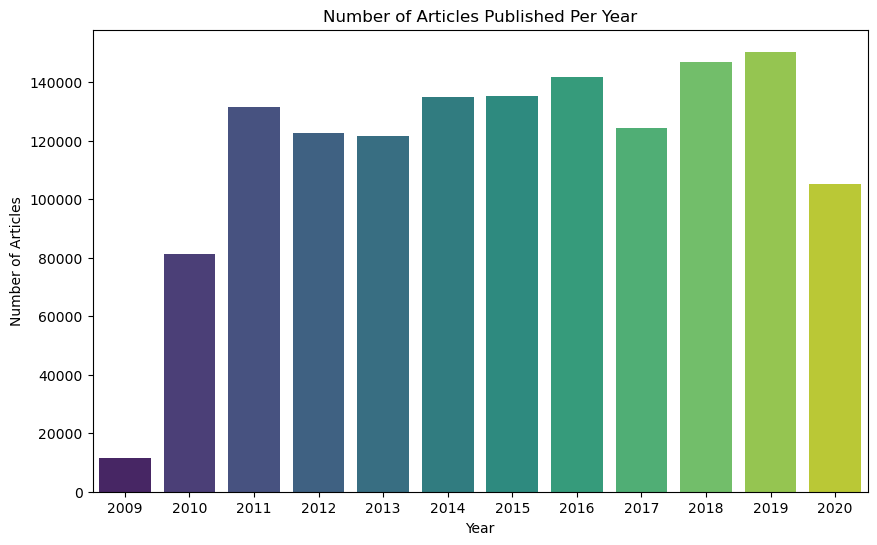

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_analyst, x='year', palette='viridis')
plt.title('Number of Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\2273351237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_analyst, x='month', palette='viridis')


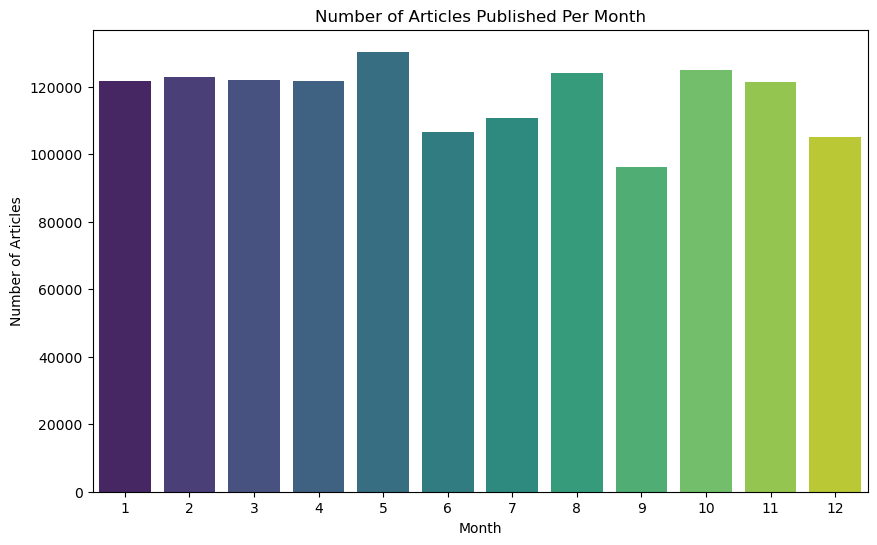

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_analyst, x='month', palette='viridis')
plt.title('Number of Articles Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()


C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\3890453552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_analyst, x='dayofweek', palette='viridis')


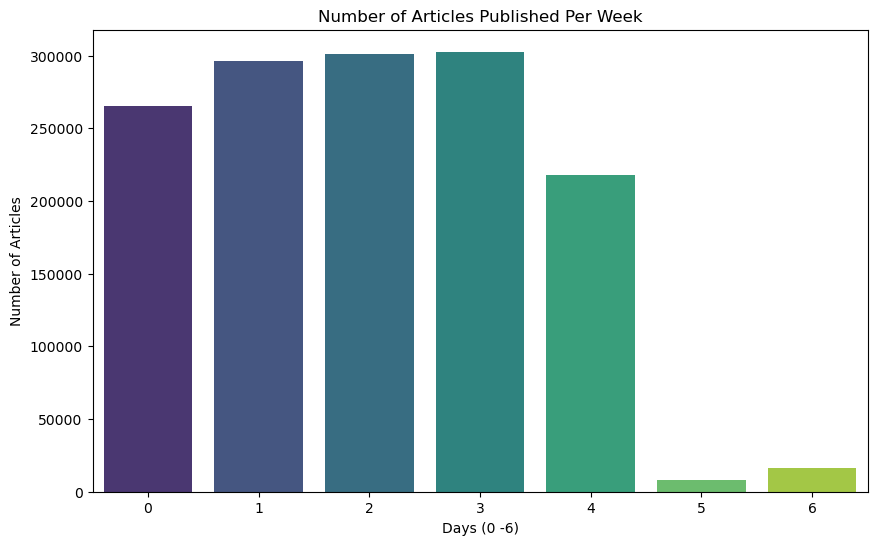

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_analyst, x='dayofweek', palette='viridis')
plt.title('Number of Articles Published Per Week')
plt.xlabel('Days (0 -6)')
plt.ylabel('Number of Articles')
plt.show()

C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\388437987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_analyst, x='hour', palette='viridis')


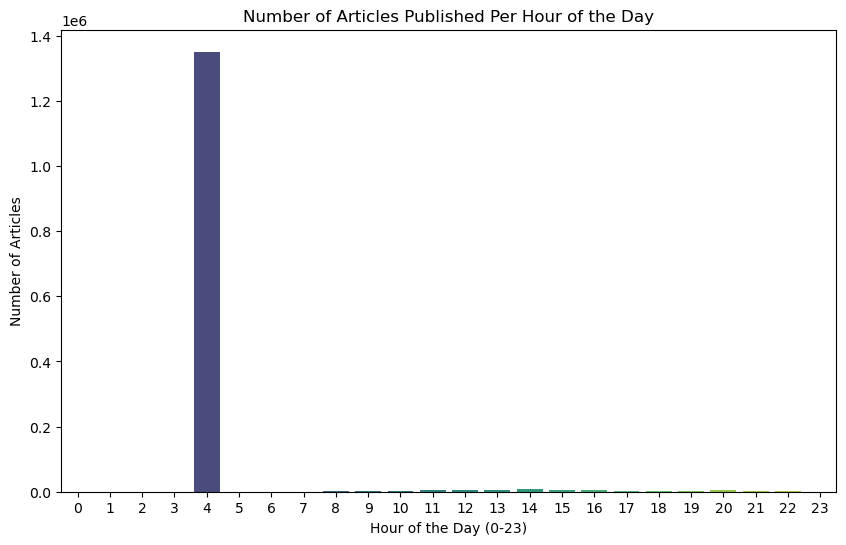

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_analyst, x='hour', palette='viridis')
plt.title('Number of Articles Published Per Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Articles')
plt.show()


In [93]:
hour_distribution = raw_analyst['hour'].value_counts().sort_index()
print(hour_distribution)

hour
0         131
1          82
2          48
3          27
4     1351408
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
Name: count, dtype: int64


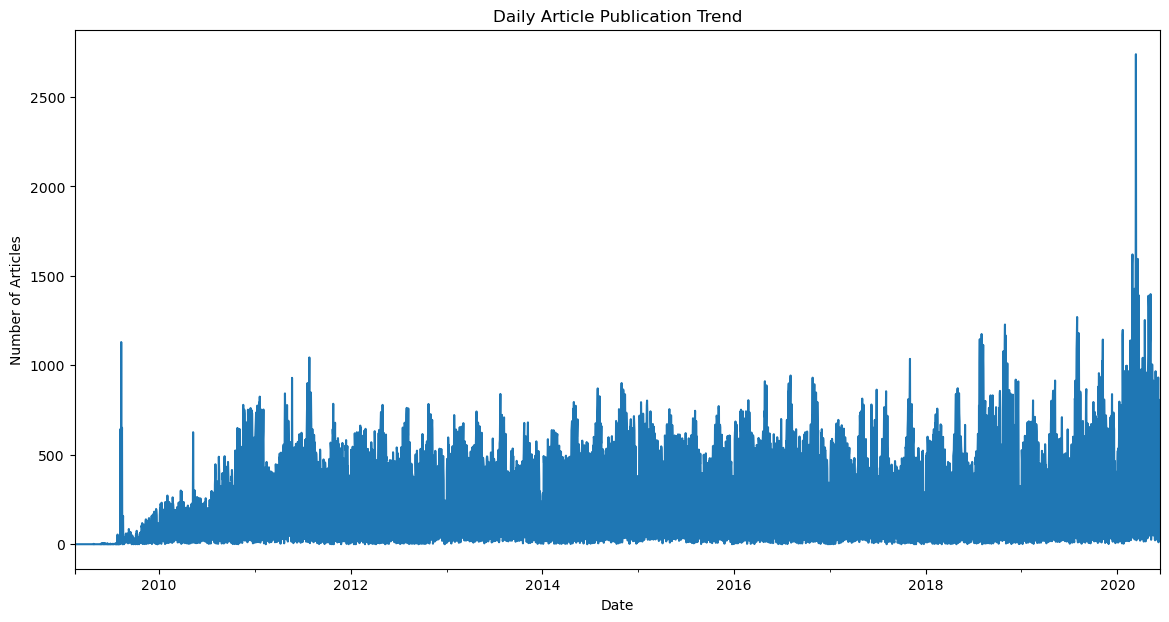

In [83]:
daily_article_count = raw_analyst.resample('D', on='date').size()

plt.figure(figsize=(14, 7))
daily_article_count.plot()
plt.title('Daily Article Publication Trend')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


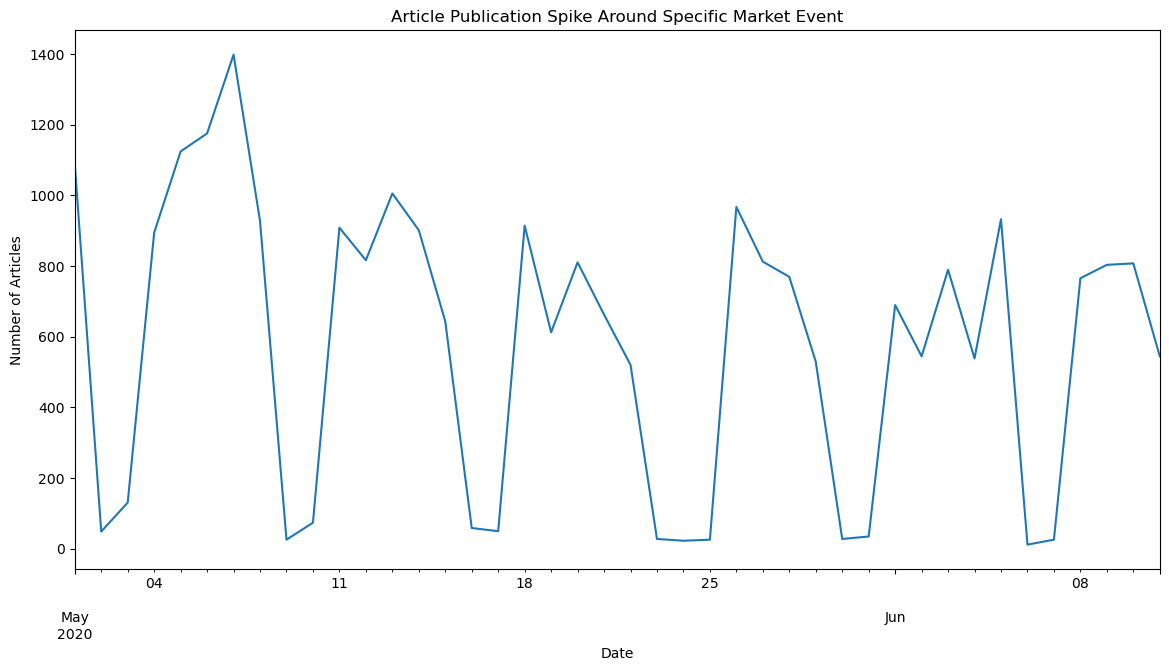

In [84]:
# Zoom into a specific period (e.g., around a known market event)
spike_period = daily_article_count['2020-05':'2020-06']  # Example period

plt.figure(figsize=(14, 7))
spike_period.plot()
plt.title('Article Publication Spike Around Specific Market Event')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


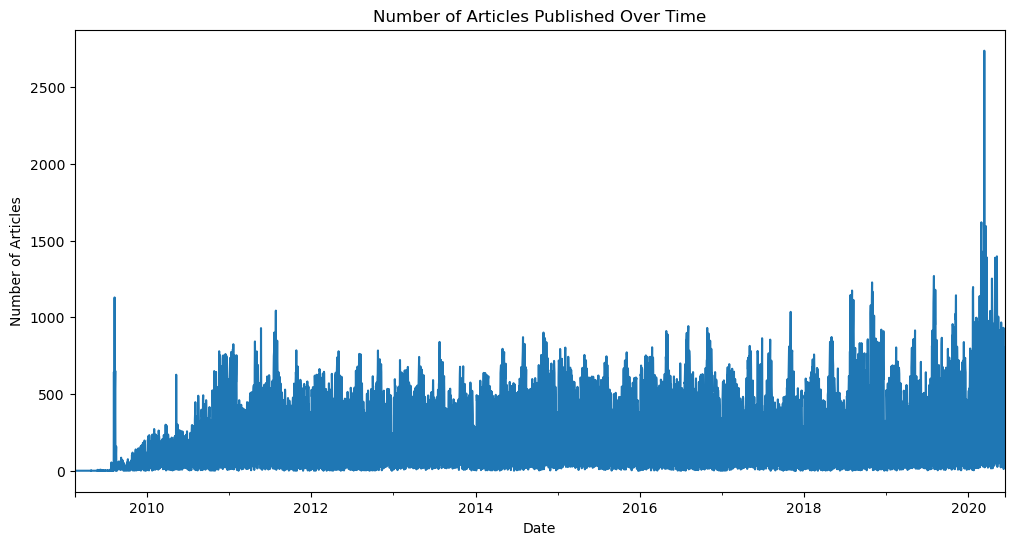

In [85]:
# Resample data by day to count the number of articles per day
raw_analyst.set_index('date', inplace=True)
daily_articles = raw_analyst.resample('D').size()

# Plot the publication frequency
plt.figure(figsize=(12, 6))
daily_articles.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


domain
Other                     1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\1724306928.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.index, y=domain_counts.values, palette='magma')


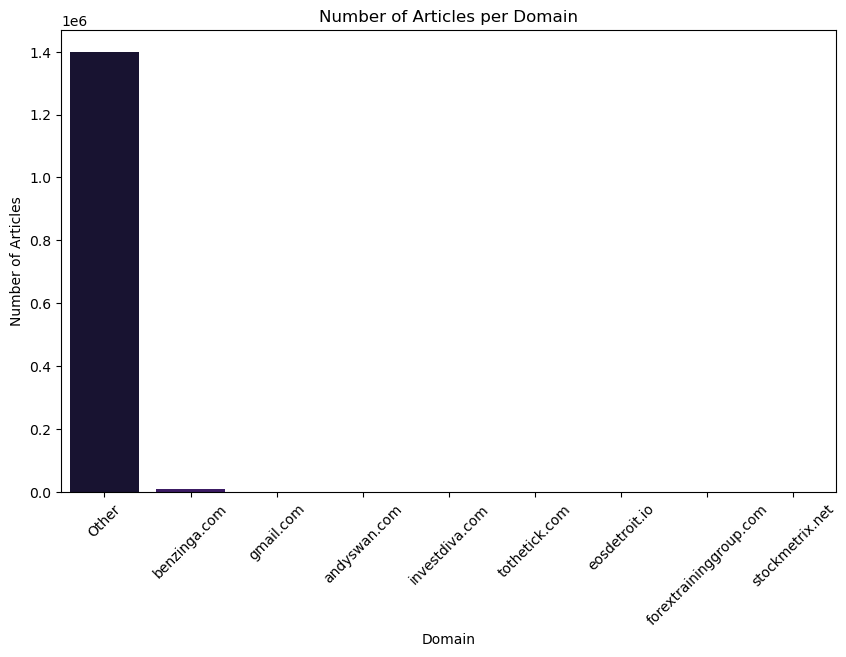

In [86]:
# Extract domain from publisher email (if applicable)
raw_analyst['domain'] = raw_analyst['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else 'Other')

# Count the number of articles per domain
domain_counts = raw_analyst['domain'].value_counts()
print(domain_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.index, y=domain_counts.values, palette='magma')
plt.title('Number of Articles per Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


publisher
Happy Trading                             0.765000
Chris Fromhertz                           0.757900
janaviktoria                              0.743000
The Professor                             0.726900
dhiraj.surapaneni@benzinga.com            0.709600
Union Square Ventures                     0.709600
Anthony Viola                             0.707692
fnmedia                                   0.700300
IIJGII                                    0.695550
Marvin Dumont                             0.690800
Patrick Krause                            0.680800
Jeff Myers                                0.669700
Mike Paulenoff                            0.648600
StockMetrix                               0.648600
Robert Morris                             0.648600
Brett Phillips                            0.636900
Eric Martin                               0.636900
javierhasseandericterbush@benzinga.com    0.636900
WikiTags                                  0.632600
giovannimola         

C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\3565634454.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_publisher.values, y=sentiment_by_publisher.index, palette='coolwarm')


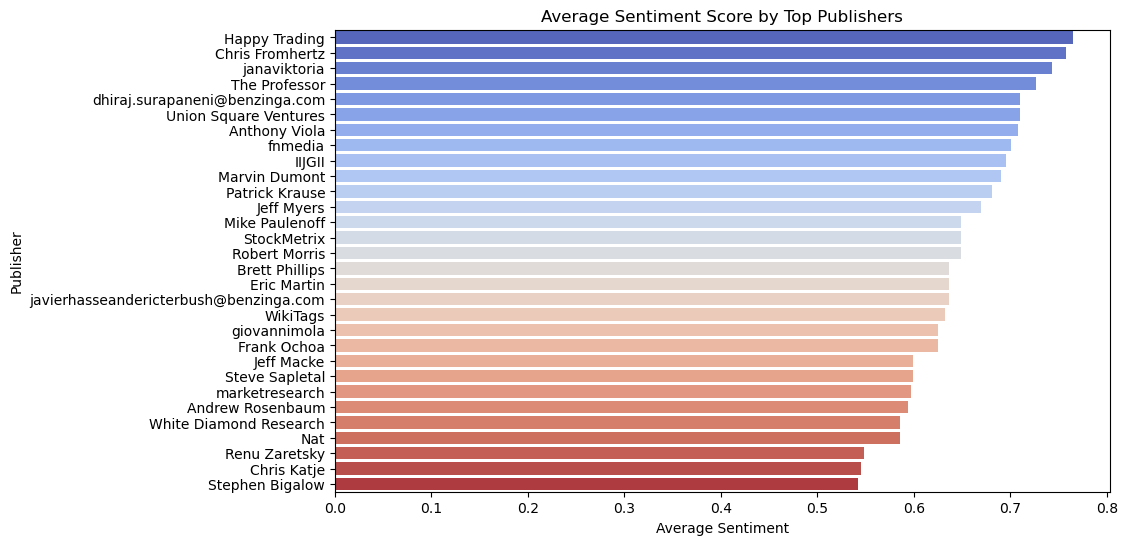

In [87]:
# Task 2: Analyze the type of news (sentiment) reported by each publisher
sentiment_by_publisher = raw_analyst.groupby('publisher')['sentiment'].mean().sort_values(ascending=False).head(30)
print(sentiment_by_publisher)

# Plot sentiment by top publishers
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_by_publisher.values, y=sentiment_by_publisher.index, palette='coolwarm')
plt.title('Average Sentiment Score by Top Publishers')
plt.xlabel('Average Sentiment')
plt.ylabel('Publisher')
plt.show()

C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\2392220545.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publisher', y='article_count', data=publisher_sentiment, ax=ax1, palette='Blues_d')
C:\Users\Ashis\AppData\Local\Temp\ipykernel_5080\2392220545.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(publisher_sentiment['publisher'], rotation=90)


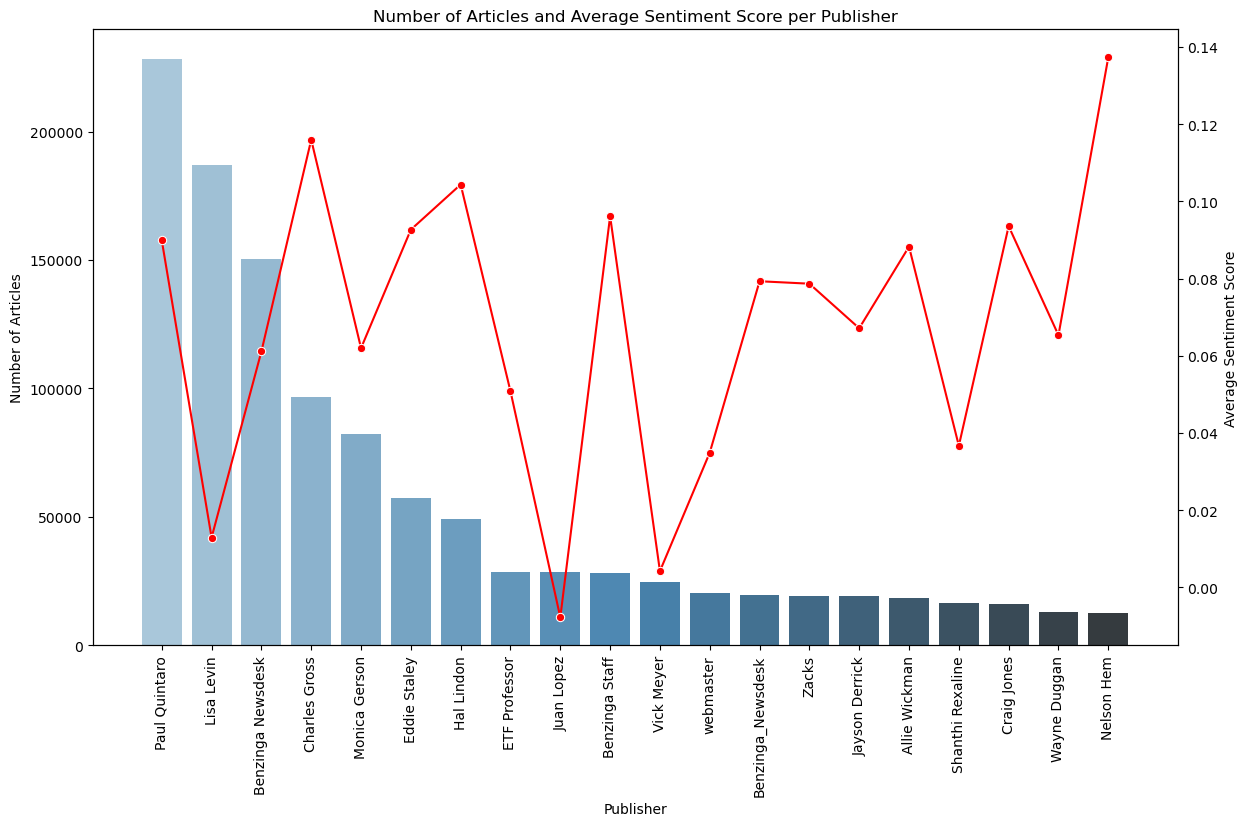

In [88]:
publisher_sentiment = raw_analyst.groupby('publisher').agg(
    article_count=('headline', 'count'),
    avg_sentiment=('sentiment', 'mean')
).reset_index()

# Sort by the number of articles
publisher_sentiment = publisher_sentiment.sort_values(by='article_count', ascending=False).head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for the number of articles
sns.barplot(x='publisher', y='article_count', data=publisher_sentiment, ax=ax1, palette='Blues_d')

# Adding the secondary axis for the sentiment score
ax2 = ax1.twinx()
sns.lineplot(x='publisher', y='avg_sentiment', data=publisher_sentiment, ax=ax2, color='red', marker='o')

# Adding titles and labels
ax1.set_title('Number of Articles and Average Sentiment Score per Publisher')
ax1.set_xlabel('Publisher')
ax1.set_ylabel('Number of Articles')
ax2.set_ylabel('Average Sentiment Score')

# Rotate x labels for better readability
ax1.set_xticklabels(publisher_sentiment['publisher'], rotation=90)

plt.show()